In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 10)

('This image is:', <type 'numpy.ndarray'>, 'with dimensions:', (720, 1280, 3))


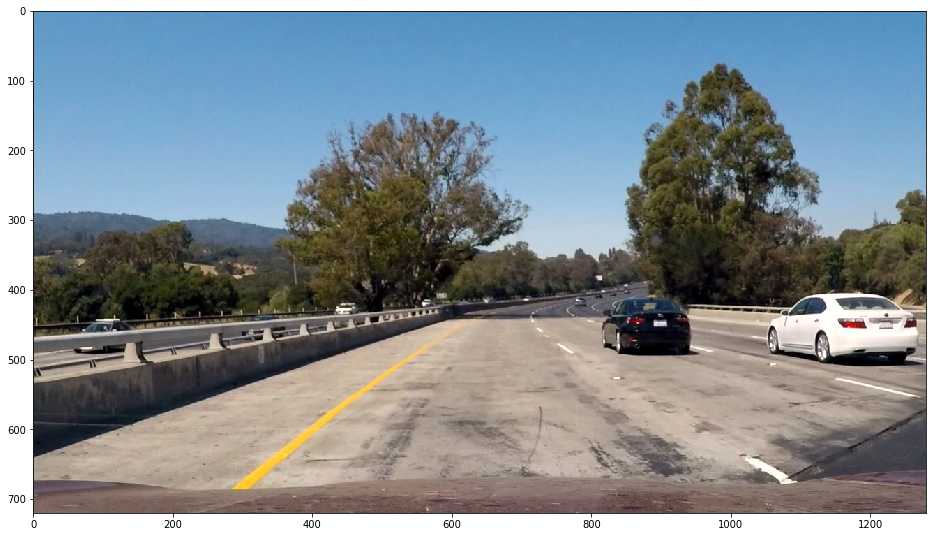

In [2]:
#reading in an image
image = mpimg.imread('test_images/test1.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image) 

In [3]:
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    draw_img = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(draw_img, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return draw_img

### Manually testing the marking the box

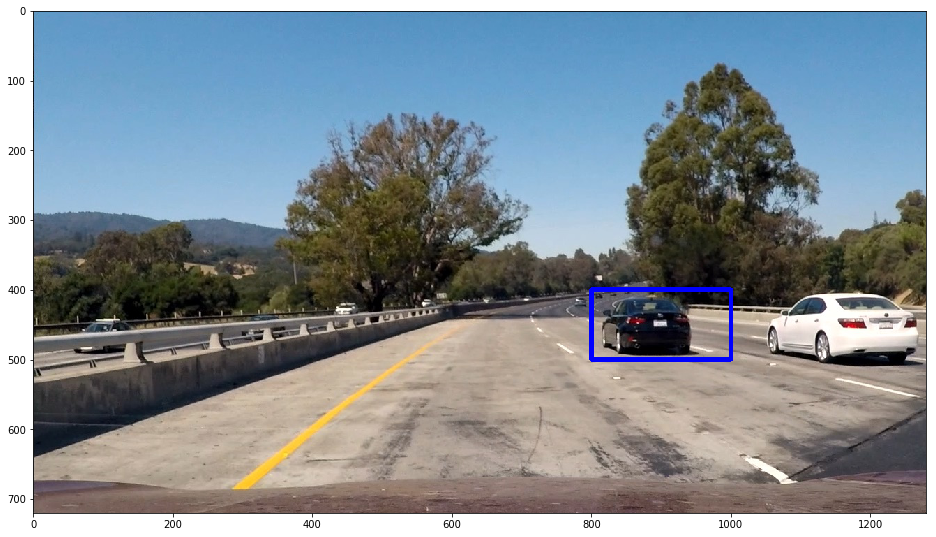

In [4]:
plt.imshow(draw_boxes(image, [((800,400), (1000,500))]))

In [5]:
from skimage.feature import hog
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block,
                     vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient,
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  transform_sqrt=True,
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:
        features = hog(img, orientations=orient,
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block),
                       transform_sqrt=True,
                       visualise=vis, feature_vector=feature_vec)
        return features    

/Users/dileepbapat/.virtualenv/lib/python2.7/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


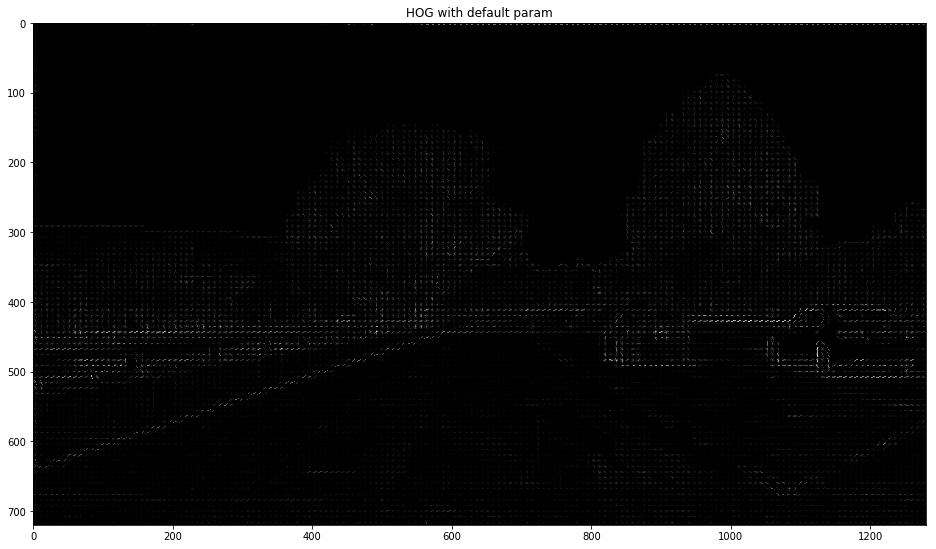

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)

# fig = plt.figure()
# plt.subplot(121)
# plt.imshow(image, cmap='gray')
# plt.title('Example Car Image')
# plt.subplot(122)
# plt.imshow(hog_image, cmap='gray')
#plt.title('HOG Visualization')
plt.imshow(hog_image, cmap='gray')
plt.title('HOG with default param')

### try different parameters

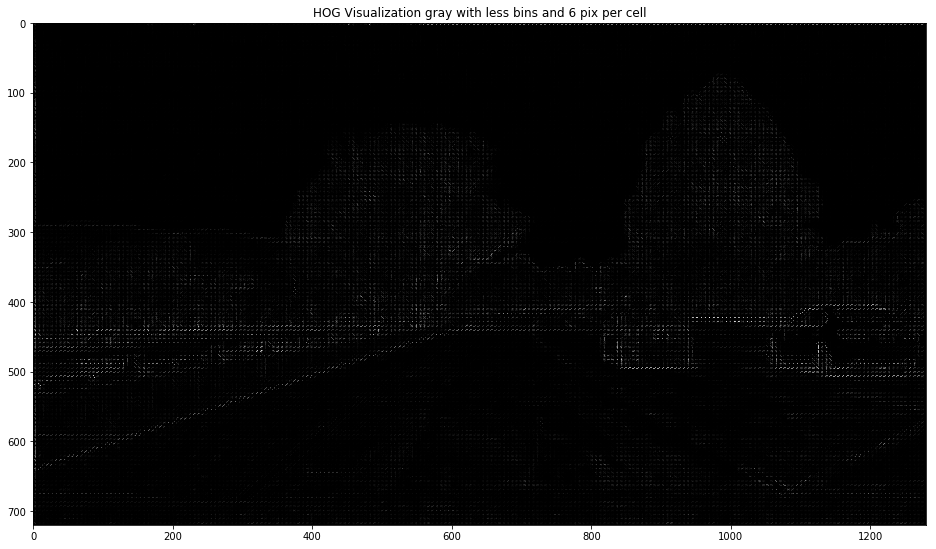

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
orient = 5
pix_per_cell = 6
cell_per_block = 1
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)

plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization gray with less bins and 6 pix per cell')



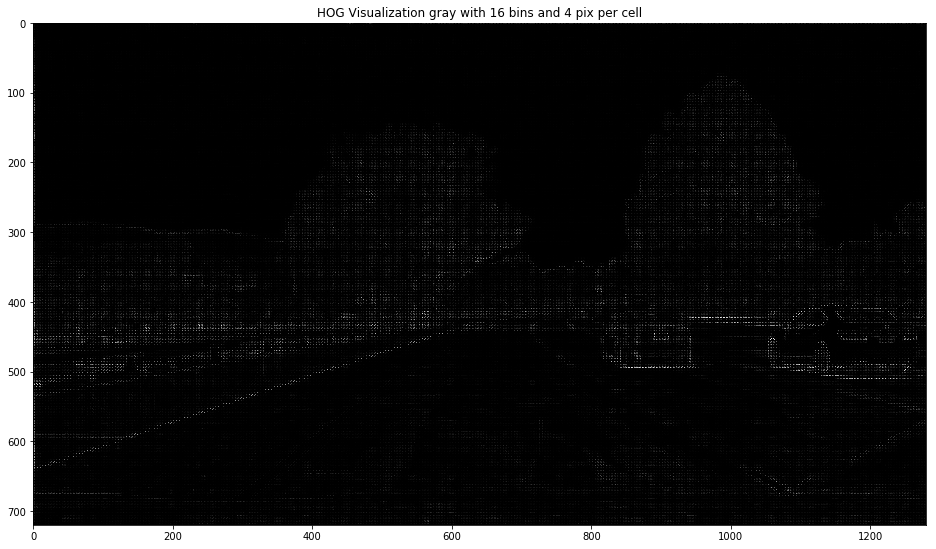

In [8]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
orient = 16
pix_per_cell = 4
cell_per_block = 1
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)

plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization gray with 16 bins and 4 pix per cell')



### try different color space

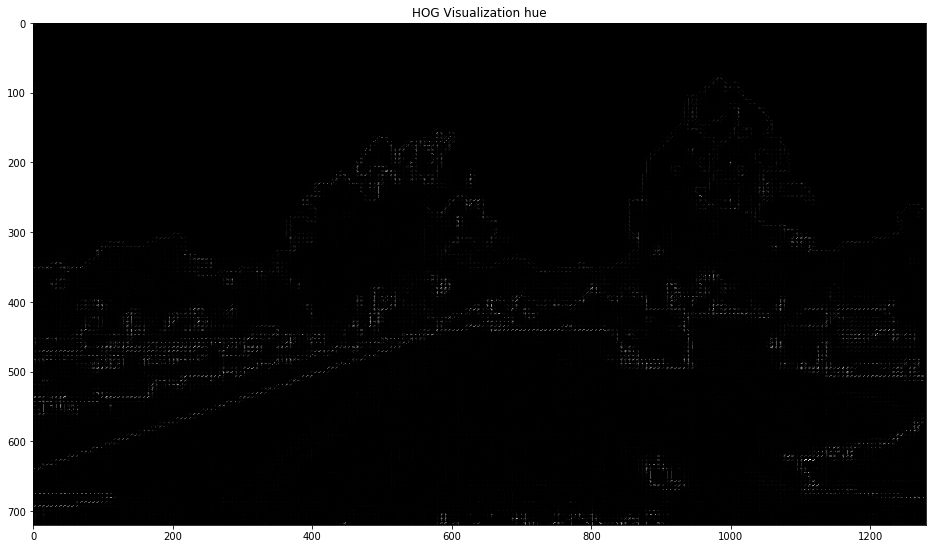

In [9]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
hue = hsv[:,:,0]
orient = 5
pix_per_cell = 6
cell_per_block = 1

features, hog_image = get_hog_features(hue, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)

plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization hue')


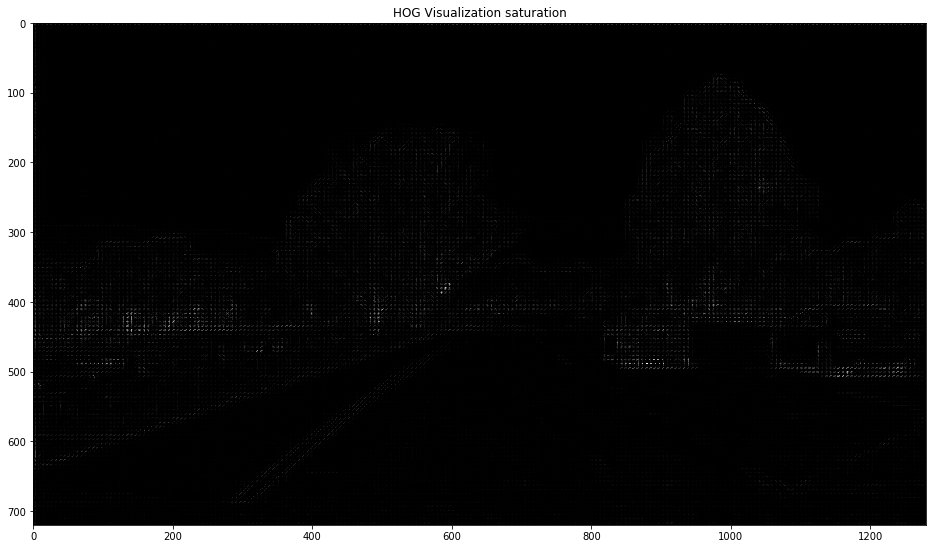

In [10]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
saturation = hsv[:,:,1]
orient = 5
pix_per_cell = 6
cell_per_block = 1

features, hog_image = get_hog_features(saturation, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)

plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization saturation')


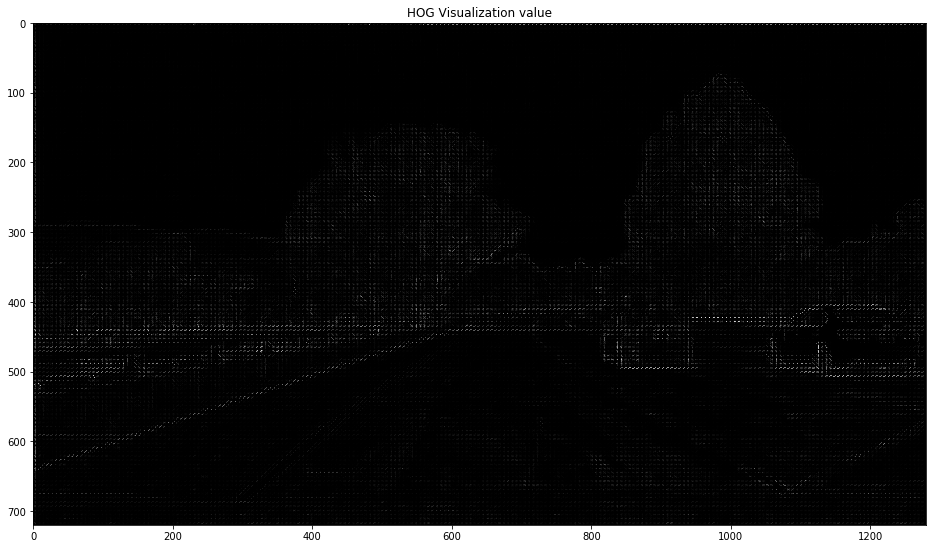

In [11]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
v = hsv[:,:,2]
orient = 5
pix_per_cell = 6
cell_per_block = 1

features, hog_image = get_hog_features(v, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)

plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization value')


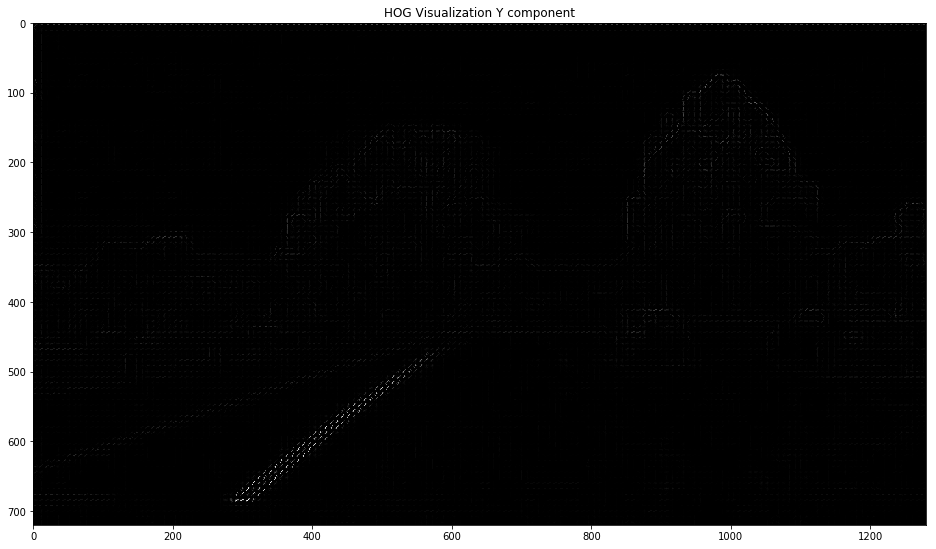

In [12]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
v = hsv[:,:,2]
orient = 9
pix_per_cell = 8
cell_per_block = 2

features, hog_image = get_hog_features(v, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)

plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization Y component')


### Visualization of value channel of hsv color space.

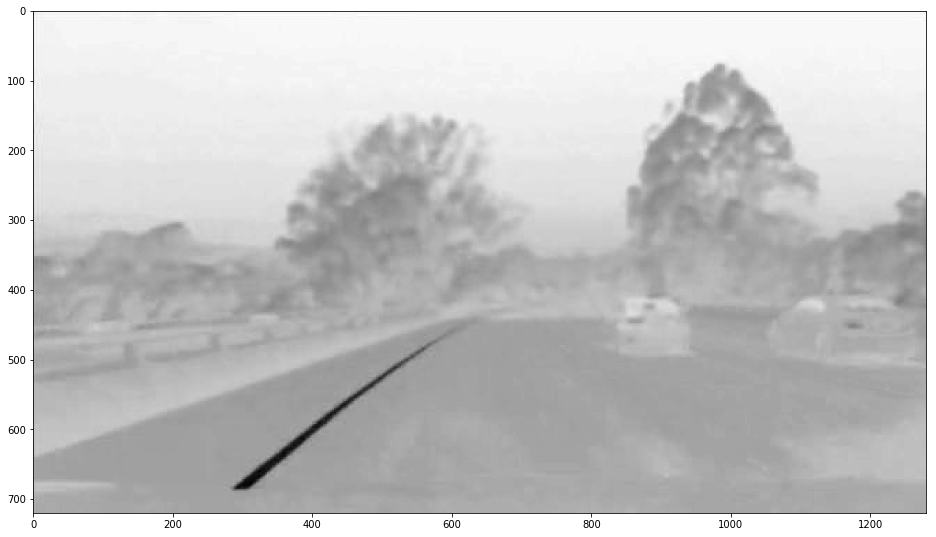

In [13]:
s=hsv[:,:,2]
plt.imshow(s, cmap='gray')

In [14]:

# Define a function to compute binned color features
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel()
    # Return the feature vector
    return features


# Define a function to compute color histogram features
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:, :, 0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:, :, 1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:, :, 2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features


# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                     hist_bins=32, orient=9,
                     pix_per_cell=8, cell_per_block=2, hog_channel=0,
                     spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)

        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else:
            feature_image = np.copy(image)

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
            # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:, :, channel],
                                                         orient, pix_per_cell, cell_per_block,
                                                         vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)
            else:
                hog_features = get_hog_features(feature_image[:, :, hog_channel], orient,
                                                pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features



In [26]:
y_start_stop=(400,670)

In [15]:
def slide_window(img, x_start_stop=(None, None), y_start_stop=(None, None), 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    # Compute the span of the region to be searched    
    # Compute the number of pixels per step in x/y
    # Compute the number of windows in x/y
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    #     Note: you could vectorize this step, but in practice
    #     you'll be considering windows one by one with your
    #     classifier, so looping makes sense
        # Calculate each window position
        # Append window position to list
    # Return the list of windows
    if x_start_stop[0] is None:
        x_start_stop = (0,img.shape[1])
    if y_start_stop[0] is None:
        y_start_stop = (0, img.shape[0])
    for x in range(x_start_stop[0],x_start_stop[1] - xy_window[0] + 1, int(xy_window[0]*xy_overlap[0])):
        for y in range(y_start_stop[0],y_start_stop[1] - xy_window[1], int(xy_window[1]*xy_overlap[1])):
            window_list.append(((x,y),(x+xy_window[0], y+xy_window[1])))
    return window_list

### Visualizing sliding window.

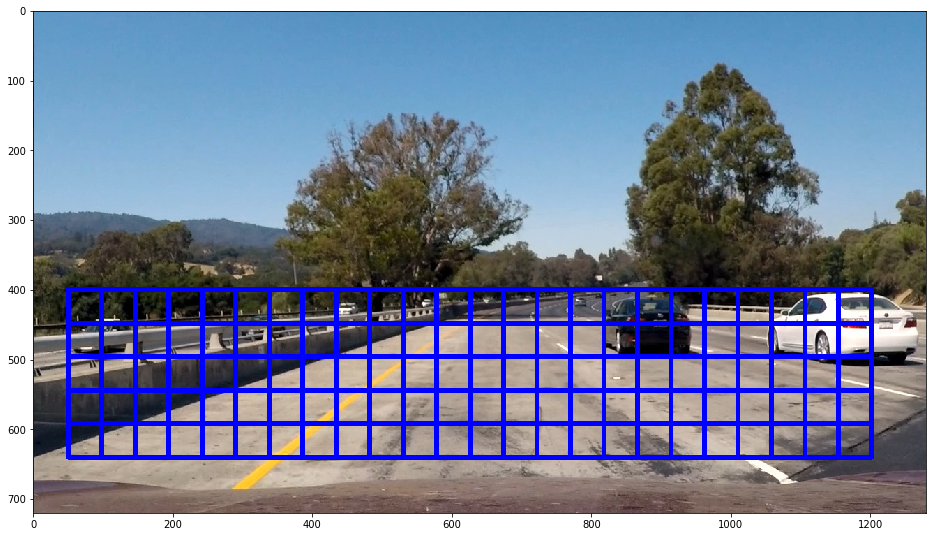

In [16]:
b=slide_window(image, x_start_stop=(50, 1230), y_start_stop=(400, 670), 
                    xy_window=(96,96), xy_overlap=(0.5, 0.5))
plt.imshow(draw_boxes(image, b))

In [17]:
def search_windows(img, windows, clf, scaler, color_space='RGB',
                   spatial_size=(32, 32), hist_bins=32,
                   hist_range=(0, 256), orient=9,
                   pix_per_cell=8, cell_per_block=2,
                   hog_channel=0, spatial_feat=True,
                   hist_feat=True, hog_feat=True):
    # 1) Create an empty list to receive positive detection windows
    on_windows = []
    # 2) Iterate over all windows in the list
    for window in windows:
        # 3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))
        # 4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space,
                                       spatial_size=spatial_size, hist_bins=hist_bins,
                                       orient=orient, pix_per_cell=pix_per_cell,
                                       cell_per_block=cell_per_block,
                                       hog_channel=hog_channel, spatial_feat=spatial_feat,
                                       hist_feat=hist_feat, hog_feat=hog_feat)
        # 5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        # 6) Predict using your classifier
        prediction = clf.predict(test_features)
        # 7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    # 8) Return windows for positive detections
    return on_windows

def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9,
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # 1) Define an empty list to receive features
    img_features = []
    # 2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else:
        feature_image = np.copy(img)
    # 3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        # 4) Append features to list
        img_features.append(spatial_features)
    # 5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        # 6) Append features to list
        img_features.append(hist_features)
    # 7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:, :, channel],
                                                     orient, pix_per_cell, cell_per_block,
                                                     vis=False, feature_vec=True))
        else:
            hog_features = get_hog_features(feature_image[:, :, hog_channel], orient,
                                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # 8) Append features to list
        img_features.append(hog_features)

    # 9) Return concatenated array of features
    return np.concatenate(img_features)


def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)


In [18]:
#First version of detection pipeline, without duplicate detection removal

def process_imagev2(image):
    draw_image = np.copy(image)
    # Uncomment the following line if you extracted training
    # data from .png images (scaled 0 to 1 by mpimg) and the
    # image you are searching is a .jpg (scaled 0 to 255)
    image = image.astype(np.float32)/255
    windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop,
                           xy_window=(96, 96), xy_overlap=(0.5, 0.5))
    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space,
                                 spatial_size=spatial_size, hist_bins=hist_bins,
                                 orient=orient, pix_per_cell=pix_per_cell,
                                 cell_per_block=cell_per_block,
                                 hog_channel=hog_channel, spatial_feat=spatial_feat,
                                 hist_feat=hist_feat, hog_feat=hog_feat)
    # print(hot_windows)
    
    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)
    return window_img

    

In [24]:
import pickle
model = pickle.load(open('modelv4.pkl'))
model

{'X_scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'cell_per_block': 3,
 'color_space': 'YCrCb',
 'hist_bins': 16,
 'hist_feat': False,
 'hog_channel': 'ALL',
 'hog_feat': True,
 'orient': 9,
 'pix_per_cell': 16,
 'spatial_feat': True,
 'spatial_size': (16, 16),
 'svc': LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0),
 'y_start_stop': [400, None]}

In [25]:
color_space = model['color_space']
orient = model['orient']
pix_per_cell = model['pix_per_cell']
cell_per_block = model['cell_per_block']
hog_channel = model['hog_channel']
spatial_size = model['spatial_size']
hist_bins = model['hist_bins']
spatial_feat = model['spatial_feat']
hist_feat = model['hist_feat']
hog_feat = model['hog_feat']
y_start_stop = model['y_start_stop']
svc = model['svc']
X_scaler=model['X_scaler']

In [21]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [27]:
white_output = 'outputv1.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("project_video.mp4")
# white_clip = clip1.subclip(2,7).fl_image(process_imagev2) #NOTE: this function expects color images!!
white_clip = clip1.subclip(2,7).fl_image(process_imagev2) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video output.mp4
[MoviePy] Writing video output.mp4


 99%|█████████▉| 125/126 [00:33<00:00,  3.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output.mp4 

CPU times: user 31.3 s, sys: 1.06 s, total: 32.4 s
Wall time: 35 s


In [28]:
# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, xstart, xstop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,xstart:xstop,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 3  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    boxes = []
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
#             hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            #test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            test_features = X_scaler.transform(np.hstack((spatial_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                #cv2.rectangle(draw_img,(xbox_left+xstart, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                boxes.append(((xbox_left+xstart, ytop_draw+ystart),(xbox_left+win_draw+xstart,ytop_draw+win_draw+ystart)))
                
    return boxes

In [29]:
image = mpimg.imread('test_images/test22.jpg')

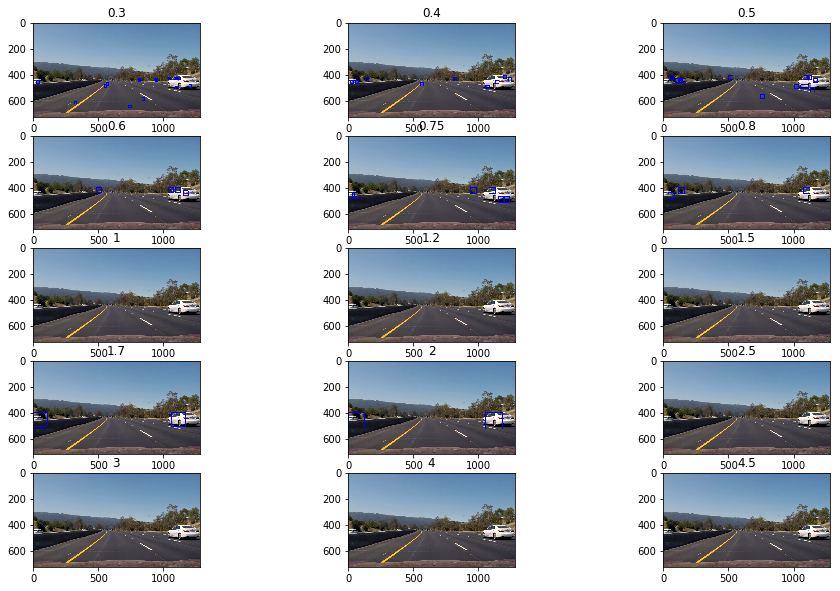

In [30]:

_, p = plt.subplots(5,3);
scales = [.3, .4, .5, .6,  0.75, .8, 1, 1.2, 1.5, 1.7, 2, 2.5, 3, 4, 4.5]
idx = 0
for i in range(5):
    for j in range(3):
        scale=scales[idx]
        idx += 1
        boxes = []
        #boxes = find_cars(image, 350, 600, 400, 1000, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
# scale=2
        boxes.extend(find_cars(image, 400, 670, 0, 1280, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))
        p[i][j].imshow(draw_boxes(np.copy(image), boxes))
        p[i][j].set_title("%s"%scale)


Looking at above sample detection we can choose the window size for our final pipeline lower scale such as .3, .4 are having too many false positives, also higher scales > 3 are not detecting car at all (which is expected as our classifier trained with 96x96 window.

In [31]:



def add_heat(heatmap, bbox_list, value=1):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += value

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def find_labeled_bboxes_with_threshold(img, labels, threshold):
    # Iterate through all detected cars
    bboxes = []
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        p1x = np.min(nonzerox)
        p1y = np.min(nonzeroy)
        p2x = np.max(nonzerox)
        p2y = np.max(nonzeroy)
        max_value = np.max(img[min(p1y, p2y):max(p1y, p2y), min(p1x,p2x):max(p1x,p2x)])
        if max_value >= threshold:
            bbox = ((p1x, p1y), (p2x, p2y))
            bboxes.append((((bbox[0][0] + bbox[1][0])/2, (bbox[0][1] + bbox[1][1])/2) ,bbox))
    return bboxes

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img


In [32]:
def pipeline_heatmap(image):
    scale=1.5
    boxes = find_cars(image, 400, 670, 0, 1280, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    scale=2
    boxes.extend(find_cars(image, 400, 670, 0, 1280, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))
    scale=.5
#     boxes.extend(find_cars(image, 400, 670, 0, 1280, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat,boxes)
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,1)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)
    return heatmap

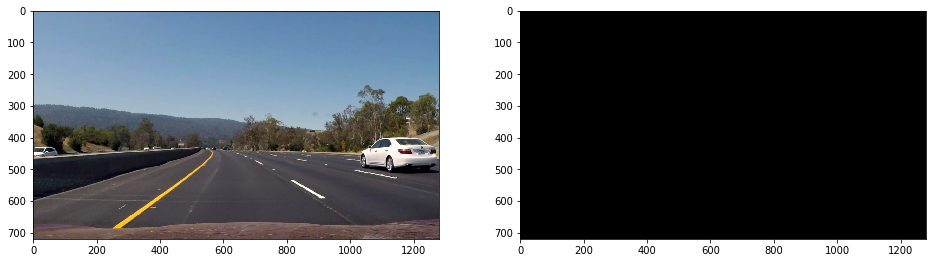

In [33]:
from scipy.ndimage.measurements import label
    # Find final boxes from heatmap using label function
heatmap = pipeline_heatmap(image)
labels = label(heatmap)
_, p=plt.subplots(1,2)
p[0].imshow(image)
p[1].imshow(labels[0], cmap='gray')

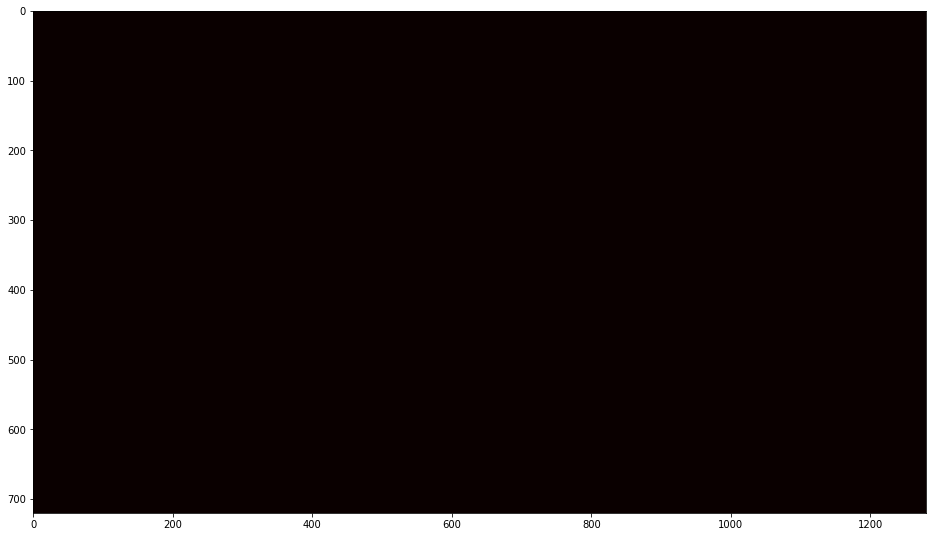

In [34]:
plt.imshow(heatmap, cmap='hot')

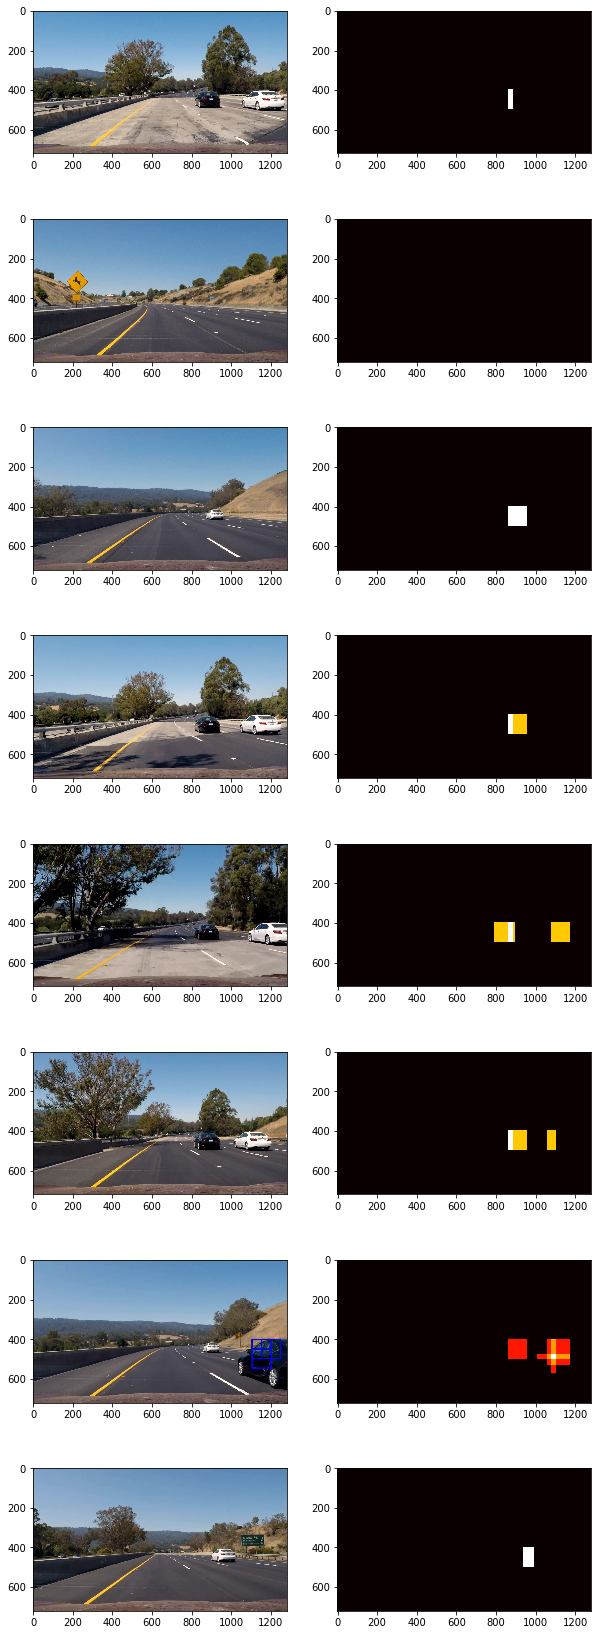

In [35]:
_, p = plt.subplots(8, 2, figsize=(10, 30))
for i in range(8):
    img = mpimg.imread('test_images/test%s.jpg'%(i+1))
    p[i][0].imshow(img)
    p[i][1].imshow(pipeline_heatmap(img), cmap='hot')

In [36]:
from math import sqrt

class Car:
    def __init__(self):
        self.pos = None
        self.dir = None
        self.box = None
        self.boxes = []
        self.age = 0
        self.confidence = 0
        
    def set_pos(self, pos, box):
        last_pos = self.pos
        self.pos = pos
        self.box = box
        self.boxes.append(box)
        self.age += 1
        self.confidence += 1.0
        if (last_pos is not None):
            self.dir = (pos[0]-last_pos[0], pos[1]-last_pos[1])
    def __str__(self):
        return "car %s confidence %s"%(self.pos,self.confidence)
    def __repr__(self):
        return self.__str__()
    def get_bounding_box(self):
        last_n_frames = 3
        p1x = p2x = p1y = p2y = 0
        c=0
        for b in self.boxes[-last_n_frames:]:
            p1x += b[0][1]
            p1y += b[0][0]
            p2x += b[1][1]
            p2y += b[1][0]
            c+=1
        avg_box = ((p1y/c, p1x/c),(p2y/c, p2x/c))
        return avg_box
    def frame(self):
        self.confidence *= .6 if self.age <10 else .9

class State:
    def __init__(self):
        self.cars=[]
        
    def clear(self):
        self.cars=[]
        
    def add_car(self, pos, box, found_boxes):
        car = self.find_nearest_or_new(pos, found_boxes)
        if car is not None :
            car.set_pos(pos, box)
    
    def find_nearest_or_new(self, pos, found_boxes):
        if (len(self.cars) == 0):
            return self._add_new_car()
        else:
            all_car_distance = [(self._dist(car.pos, pos), car) for car in self.cars]
            all_car_distance.sort(key=lambda x: x[0])
            closest = all_car_distance[0]
            if (closest[0]<80):
                return closest[1]
            else:
                if (found_boxes >1):
                    return self._add_new_car()
                else:
                    return None
    def _add_new_car(self):
        car = Car()
        self.cars.append(car)
        return car
    def _dist(self, p1, p2):
        return sqrt((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2 )
    def get_cars(self):
        return self.cars
    def frame(self):
        for car in self.cars:
            car.frame()
            if (car.confidence < .4):
                self.cars.remove(car)
    
state=State()

In [37]:
test_state = State()
test_state.add_car((100,100), ((75,75), (125,125)), 1)
print test_state.get_cars()
test_state.add_car((120,100), ((75,75), (125,125)), 1)
cars = test_state.get_cars()
assert len(cars) == 1
print test_state.get_cars()

[car (100, 100) confidence 1.0]
[car (120, 100) confidence 2.0]


* Test the state and car classes

In [38]:
test_state.add_car((140,130), ((75,75), (125,125)), 1)
test_state.add_car((340,330), ((75,75), (125,125)), 2)
cars = test_state.get_cars()
assert len(cars) == 2
print test_state.get_cars()
test_state.frame()
print test_state.get_cars()

[car (140, 130) confidence 3.0, car (340, 330) confidence 1.0]
[car (140, 130) confidence 1.8, car (340, 330) confidence 0.6]


In [41]:
state.clear()
def pipeline_v3(image):
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    scale=2
    boxes = find_cars(image, 400, 670, 0, 1280, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    heat = add_heat(heat,boxes)
    scale=1.5
    boxes.extend(find_cars(image, 400, 670, 0, 1280, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))
    scale=1.2
    boxes.extend(find_cars(image, 400, 670, 0, 1280, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))
#     scale=.75
#     boxes.extend(find_cars(image, 400, 670, 0, 1280, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins))

#     print boxes
    
    # Add heat to each box in box list
    heat = add_heat(heat,boxes)

    heatmap = np.clip(heat, 0, 255)
    from scipy.ndimage.measurements import label
    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    #bboxes = find_labeled_bboxes(np.copy(image), labels)
    bboxes = find_labeled_bboxes_with_threshold(np.copy(heat), labels, 2)
    #print labels
    for b in bboxes:
        state.add_car(b[0], b[1], heat[b[0][1]][b[0][0]])
    
    for car in state.get_cars():
        if (car.age > 2 and car.confidence >=1.0):
            #cv2.circle(image,car.pos, 6, (0,255,255), 2)
            bbox = car.get_bounding_box()
            cv2.rectangle(image, bbox[0], bbox[1], (255,0,255), 6)
#     image= draw_boxes(image, boxes, (0,255,0), 2)
    #image= draw_boxes(image, [b[1] for b in bboxes])
    state.frame()
    return image

[car (159, 463) confidence 1.176, car (1119, 463) confidence 1.176]


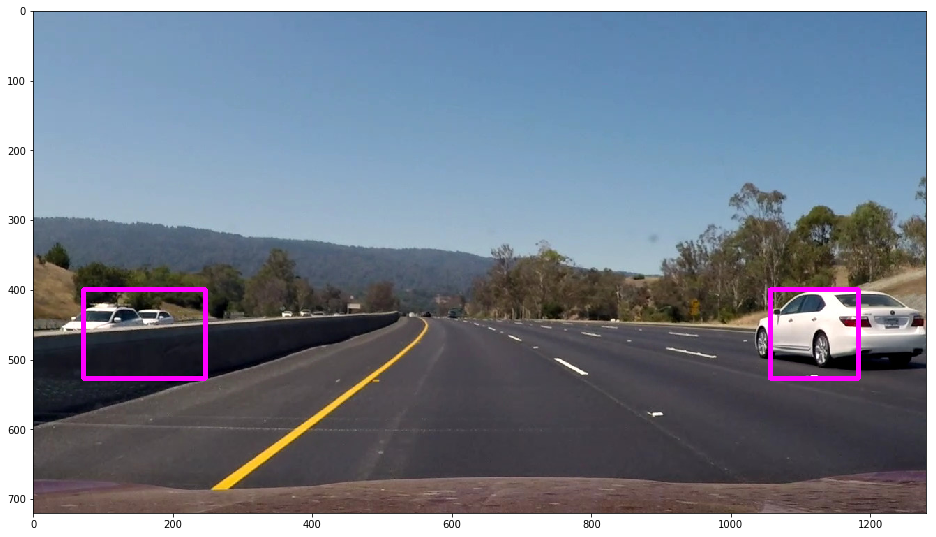

In [46]:
state.clear()
image = mpimg.imread('test_images/test21.jpg')
pipeline_v3(np.copy(image))
pipeline_v3(np.copy(image))

plt.imshow(pipeline_v3(np.copy(image)))
print state.get_cars()


In [ ]:
state.clear()
white_output = 'output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("project_video.mp4")
# white_clip = clip1.subclip(2,7).fl_image(process_imagev2) #NOTE: this function expects color images!!
white_clip = clip1.fl_image(pipeline_v3) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

In [48]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}?a">
</video>
""".format("output.mp4"))